In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('home_appliances.csv',encoding= 'unicode_escape', sep=',')

In [3]:
df.head()

,Electricity(units),Age,Maintenance,Appliance type,CO2 Emissions
0,345.0,2.0,Regular,Washing Machine,0.6
1,450.0,3.0,Regular,Dryer,0.8
2,275.0,1.0,Irregular,Dishwasher,0.5
3,420.0,2.0,Regular,Refrigerator,0.7
4,200.0,5.0,Regular,Television,0.4


In [4]:
df.describe()

,Electricity(units),Age,CO2 Emissions
count,216.000000,216.000000,216.000000
mean,342.361111,2.768519,0.579630
std,54.676462,1.361302,0.113923
min,200.000000,1.000000,0.000000
25%,303.750000,2.000000,0.500000
50%,350.000000,3.000000,0.600000
75%,386.250000,4.000000,0.700000
max,450.000000,5.000000,0.800000


In [5]:
df.isna().sum()

Electricity(units)    1
Age                   1
Maintenance           1
Appliance type        1
CO2 Emissions         1
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()

Electricity(units)    0
Age                   0
Maintenance           0
Appliance type        0
CO2 Emissions         0
dtype: int64

In [8]:
# df[['Electricity(units)', 'Age','CO2 Emissions']] = df[['Electricity(units)', 'Age','CO2 Emissions']].apply(pd.to_numeric)
# print(df.dtypes)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 216
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Electricity(units)  216 non-null    float64
 1   Age                 216 non-null    float64
 2   Maintenance         216 non-null    object 
 3   Appliance type      216 non-null    object 
 4   CO2 Emissions       216 non-null    float64
dtypes: float64(3), object(2)
memory usage: 10.1+ KB


/var/folders/mn/r97rfrgx549chn4x7dwcz_q80000gn/T/ipykernel_62891/1999486822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot: >

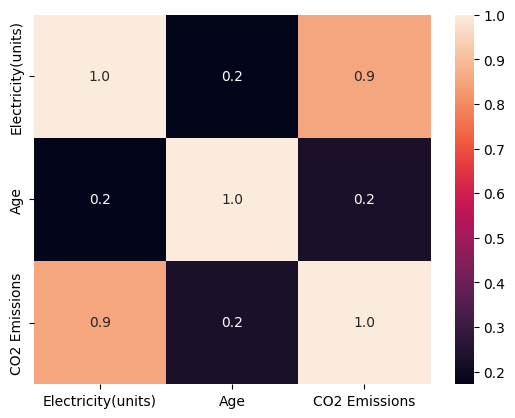

In [10]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.1f')

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder1=LabelEncoder()
df['Maintenance']=label_encoder1.fit_transform(df['Maintenance'])

label_encoder2=LabelEncoder()
df['Appliance type']=label_encoder2.fit_transform(df['Appliance type'])

# label_encoder3=LabelEncoder()
# df['Fuel Type']=label_encoder3.fit_transform(df['Fuel Type'])

In [12]:
df.head()

,Electricity(units),Age,Maintenance,Appliance type,CO2 Emissions
0,345.0,2.0,1,23,0.6
1,450.0,3.0,1,6,0.8
2,275.0,1.0,0,5,0.5
3,420.0,2.0,1,17,0.7
4,200.0,5.0,1,19,0.4


In [13]:
le_name_mapping1 = dict(zip(label_encoder1.classes_, label_encoder1.transform(label_encoder1.classes_)))
print(le_name_mapping1)

{'Irregular': 0, 'Regular': 1}


In [14]:
le_name_mapping2 = dict(zip(label_encoder2.classes_, label_encoder2.transform(label_encoder2.classes_)))
print(le_name_mapping2)

{'Air Conditioner': 0, 'Blender': 1, 'Ceiling Fan': 2, 'Coffee Maker': 3, 'Computer': 4, 'Dishwasher': 5, 'Dryer': 6, 'Food Processor': 7, 'Freezer': 8, 'Furnace': 9, 'Hair Dryer': 10, 'Heater': 11, 'Ice Maker': 12, 'Iron': 13, 'Light Bulb': 14, 'Microwave': 15, 'Oven': 16, 'Refrigerator': 17, 'Stove': 18, 'Television': 19, 'Toaster': 20, 'Toaster Oven': 21, 'Vacuum Cleaner': 22, 'Washing Machine': 23, 'Water Heater': 24}


In [15]:
import pickle
with open('maintenance.pickle', 'wb') as handle:
    pickle.dump(le_name_mapping1, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('maintenance.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [16]:
import pickle
with open('appliance_type.pickle', 'wb') as handle:
    pickle.dump(le_name_mapping2, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('appliance_type.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [17]:
from sklearn.model_selection import train_test_split

X=df.drop('CO2 Emissions',axis=1)
y=df['CO2 Emissions']
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.3)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
rf.score(X_test,y_test)

0.9118025107991357

In [20]:
import xgboost

xgb=xgboost.XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [21]:
xgb.score(X_test,y_test)

0.9481150128953485

In [22]:
pickle.dump(rf, open('home_appliances_co2.pkl', 'wb'))

In [23]:
def predFunc2(electricity, age, maintenance, appliance_type):
    with open('maintenance.pickle', 'rb') as handle:
        b1 = pickle.load(handle)
    with open('appliance_type.pickle', 'rb') as handle:
        b2 = pickle.load(handle)
    model=pickle.load(open('home_appliances_co2.pkl', 'rb'))
    val1=b1.get(maintenance)
    val2=b2.get(appliance_type)
#     val3=b3.get(fuel_type)
    ans=model.predict([[electricity, age, val1, val2]])
    return ans[0]

In [24]:
predFunc2(345,2,'Regular','Oven')

/Users/adwaitlaxmikantbhosale/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.600000000000001

In [25]:
xgb.predict([[345,2,'Regular','Oven']])

XGBoostError: [19:00:00] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/c_api/../data/array_interface.h:468: Unicode-2 is not supported.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000016b172534 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016b1832a8 xgboost::ArrayInterface<2, false>::AssignType(xgboost::StringView) + 532
  [bt] (2) 3   libxgboost.dylib                    0x000000016b182e40 xgboost::ArrayInterface<2, false>::Initialize(std::__1::map<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, xgboost::Json, std::__1::less<void>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const, xgboost::Json> > > const&) + 156
  [bt] (3) 4   libxgboost.dylib                    0x000000016b1829d0 xgboost::data::ArrayAdapter::ArrayAdapter(xgboost::StringView) + 132
  [bt] (4) 5   libxgboost.dylib                    0x000000016b1824e8 XGDMatrixCreateFromDense + 68
  [bt] (5) 6   libffi.dylib                        0x00000001ac310050 ffi_call_SYSV + 80
  [bt] (6) 7   libffi.dylib                        0x00000001ac318af4 ffi_call_int + 1208
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x00000001015c8774 _ctypes_callproc + 1236
  [bt] (8) 9   _ctypes.cpython-39-darwin.so        0x00000001015c2ba8 PyCFuncPtr_call + 1196



In [26]:
y_pred=rf.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {rmse}")

MAE: 0.012600000000000227
MSE: 0.0007732153846153874
RMSE: 0.02780675070221955


<BarContainer object of 3 artists>

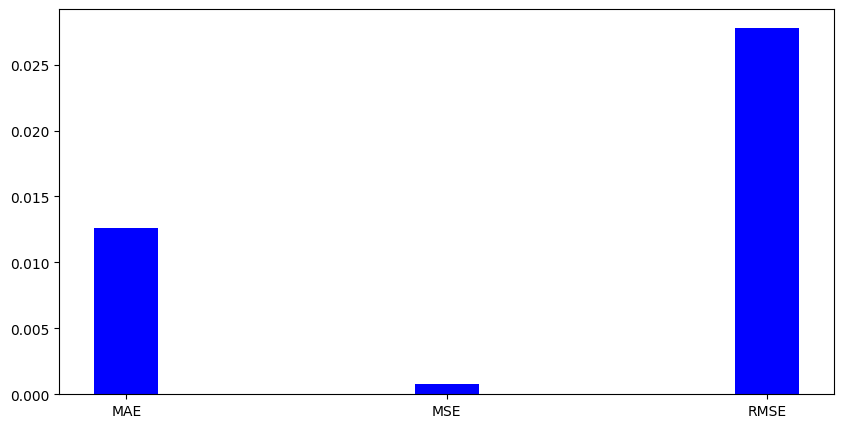

In [30]:
import matplotlib.pyplot as plt
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)

errors={"MAE": mae,
        "MSE":mse,
       "RMSE":rmse}
err=list(errors.keys())
vals=list(errors.values())

fig=plt.figure(figsize=(10,5))
plt.bar(err,vals,color='b',width=0.2)

In [35]:
keys = list(errors.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(errors[k][:-1]) for k in keys]
sns.barplot(x=keys, y=vals)

IndexError: invalid index to scalar variable.